## Week 1 - Exercise 2

Author: Khushee Kapoor

Last Updated: 20/03/2022

In this notebook, I have implemented the Linear Regression algorithm using the Scikit-Learn library in Python to predict the median value of a house by training the model on the Boston Housing dataset.

**Meta-Data about Boston Dataset:**

- crim - per capita crime rate by town
- zn - proportion of residential land zoned for lots over 25,000 sq.ft.
- indus - proportion of non-retail business acres per town.
- chas - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- nox - nitric oxides concentration (parts per 10 million)
- rm - average number of rooms per dwelling
- age - proportion of owner-occupied units built prior to 1940
- dis - weighted distances to five Boston employment centres
- rad - index of accessibility to radial highways
- tax - full-value property-tax rate per 10,000 usd
- ptratio - pupil-teacher ratio by town
- black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- lstat - % lower status of the population
- medv - Median value of owner-occupied homes in 1000's usd

### Setting Up

To start, we have imported the following libraries:

- NumPy: to implement the Linear Regression algorithm
- Pandas: to manipulate the dataframe
- MatPlotLib: for data visualization
- Seaborn: for data visulization

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Q1. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

To solve Question 1, we read the boston housing csv file into a dataframe using the read_csv() function from the Pandas library.

In [2]:
# reading the dataset into a dataframe
df = pd.read_csv('Boston.csv')

### Data Preprocessing

Before we begin, let us perform some basic exploratory data analysis. First, we view a glimpse of the dataframe using the head() function from the Pandas library.

In [3]:
# viewing the first 5 rows of the dataframe
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Next, we view a summary of the attributes using the describe() function from the Pandas library.

In [4]:
# viewing a summary of the attributes
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To further dive into column descriptions, let's also plot a boxplot for all the columns using the boxplot() function from the Pandas library.

Text(0.5, 0, 'Columns')

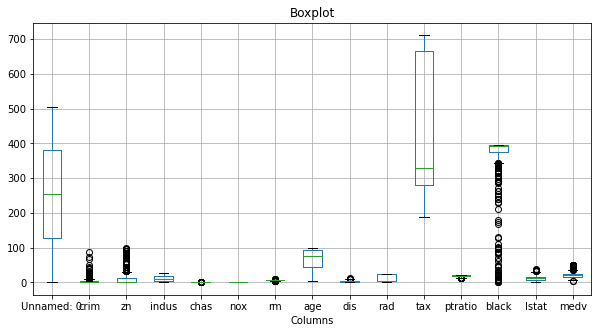

In [5]:
# plotting a boxplot
plt.figure(figsize=(10,5))
df.boxplot()
plt.title('Boxplot')
plt.xlabel('Columns')

As we can see:

- crim attribute has outliers on the higher side
- zn attribute has outliers on the higher side
- indus attribute has no outliers
- chas attributenoz is discrete
- nox attribute has no outliers
- rm attribute has outliers on the higher side
- age attribute has no outliers
- dis attribute has outliers on the higher side
- rad attribute has no outliers
- tax attribute has no outliers
- ptratio attribute has no outliers
- black attribute has outliers on the lower side
- lstat attribute has outliers on the higher side
- medv attribute has outliers on the higher side
- there are no missing values

To deal with the outliers without reducing our dataset, we iterate over the columns in the dataframe and replace the outliers with the median of the column using the quantile(), median(), and where() functions from the NumPy library.

In [6]:
# replacing the outliers with median
for column in df.drop(df.chas).columns:
    
    q1 = np.quantile(df[column], 0.25)
    q3 = np.quantile(df[column], 0.75)
    iqr = q3 - q1
    
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    
    q2 = df[column].median()
    
    df[column] = np.where(df[column]>upper_bound, q2, df[column])
    df[column] = np.where(df[column]<lower_bound, q2, df[column])

Next, we identify the best 5 features to predict the house price using pearson's correlation. To do this, we first use the corr() function from the Pandas library to calculate the correlations between the columns, then we choose the medv column and sort the values by their absolute value in the descending order by using the sort_values() function from the Pandas library and setting the parameters key and ascending to abs and False respectively. Then we splice the resultant series to find the top 5 values and ignore the first value since that will be 1 (correlation with the column itself).

In [7]:
# finding top 5 best features to predict medv
df.corr().medv.sort_values(key=abs, ascending=False)[1:6]

lstat   -0.710561
indus   -0.584221
tax     -0.568349
rm       0.563201
nox     -0.554382
Name: medv, dtype: float64

As we can see, the top 5 features to predict medv are lstat, indus, tax, rm, and nox.

Adding on to the data pre-processing process, we scale the top 5 features using min-max scaler to prevent the overpower of any one feature over the other due to difference in scale. To implement this, we use the MinMaxScaler from the Sklearn library.

In [8]:
# scaling the top 5 features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[['lstat', 'indus', 'tax', 'rm', 'nox']] = scaler.fit_transform(df[['lstat', 'indus', 'tax', 'rm', 'nox']])

### Q2/3. Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features. Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

To solve Questions 2 and 3, we use the end result of Question 1 and choose the top 3 features - lstat, indus and tax. To begin, we separate the independent and dependent variables and store them in x and y respectively.

In [9]:
# separating the dependent and independent variables
x = df[['lstat', 'indus', 'tax']]
y = df['medv']

Next, we split the dataset into training and testing sets. To do this, we use the train_test_split() function from the SKlearn library. We also set the train_size parameter to 0.8 to ensure that 80% of the data is put into the training set and the remaining into the testing set.

In [42]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=150)

Next, we build a linear regression model by using the LinearRegression module from the SKlearn library. We fit our training dataset into the model and then use it to predict the output of the testing dataset.

In [43]:
# building and training the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

# predicting the output of the testing dataset
y_pred = linreg.predict(x_test)

Next, we use the predicted values to find the root mean squared error. To do that, we use the mean_squared_error() function from the SKlearn library and the sqrt() function from the NumPy library to find it's square root. To generate deeper insights, we also find out how varied are the predicted values from the actual values by dividing the rmse by the average of the actual values.

In [53]:
# finding the rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: ', rmse)
print('Percentage Variation: ', (rmse/np.mean(y_test)*100), '%')

RMSE:  4.152810145494985
Percentage Variation:  19.97202295442918 %


As we can see, on testing the model, we get an rmse of 4.15 which causes a variation of 19%.

Next, we find out the R-Squared score. To do this, we use the score() function of the LinearRegression() module from the SKlearn library.

In [45]:
# finding the r2 value
r2 = linreg.score(x_test, y_test)
print('R2: ', r2)

R2:  0.6017386016228203


As we can see, the R2 value is 0.60, which means that 60% of the data points lie on the regression line. This is a moderate score.